# Feature Collinearity

* If we have two features ‘f1’ and ‘f2’, and if one feature can be expressed as a linear function of the other feature (say f1 = αf2 + β), then we can say that both ‘f1’ and ‘f2’ are collinear.

* If we have the features f1, f2, f3, ….., fd and if they all are linearly related such as f1 = α1 + α2f2 + α3f3 + …. + αdfd, then we can say that f1, f2, f3, ….., fd are  multicollinear.


# The Problem with having Multicollinearity

* Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. For example, let’s assume that in the following linear equation:

###<center>Y = W0+W1*X1+W2*X2</center>
* Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

* “ This makes the effects of X1 on Y difficult to distinguish from the effects of X2 on Y. ”

* Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.




# What causes Multicollinearity?

Multicollinearity could occur due to the following problems:

* Multicollinearity could exist because of the problems in the dataset at the time of creation. These problems could be because of poorly designed experiments, highly observational data, or the inability to manipulate the data. 

  * For example, determining the electricity consumption of a household from the household income and the number of electrical appliances. Here, we know that the number of electrical appliances in a household will increase with household income. However, this cannot be removed from the dataset

* Multicollinearity could also occur when new variables are created which are dependent on other variables.
  * For example, creating a variable for BMI from the height and weight variables would include redundant information in the model

* Including identical variables in the dataset:
  * For example, including variables for temperature in Fahrenheit and temperature in Celsius

* Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap.
  * For example, in a dataset containing the status of marriage variable with two unique values: ‘married’, ’single’. Creating dummy variables for both of them would include redundant information. We can make do with only one variable containing 0/1 for ‘married’/’single’ status.
* Insufficient data in some cases can also cause multicollinearity problems





# How to Identify Multi Colinearity?
1. we can use correlation Coefficient 
2. We can use VIF (Variation Inflation Factor)
3. Perturbation test

# How to deal with Multi Collinearity

1. Variable Selection

* The most straightforward method is to remove some variables that are highly correlated to others and leave the more significant ones in the set. 

2. Variable Transformation

* The second method is to transform some of the variables to make them less correlated but still maintain their feature. 
  * What do I mean by this? for example  in a housing dataset , I can transfer ‘years of built’ to ‘age of the house’ by subtracting current year by years of built. For example, if the year of building is 1994, then the age of the house is 2020–1994=26 years.


3. Principal Component Analysis

* Principal Component Analysis(PCA) is commonly used to reduce the dimension of data by decomposing data into a number of independent factors. It has many applications like simplifying model calculation by reducing the number of predicting factors. However, in our case here, we will just use the character of variable independence for PCA to remove the multi-collinearity issue in the model.

# Lets Understand Multicollinearity with correlation and VIF (Variation Inflation Factor)

# VIF (Variation Inflation Factor

* VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

####<center>or</center>

* VIF score of an independent variable represents how well the variable is explained by other independent variables.

* The variance inflation factor represents the quotient of model variance with many terms against model variance with a single term. It is the score of an independent variable representing the degree to which other independent variables explain the variable.

* In simpler terms, it is a measure of the levels of multicollinearity in a group of regression variables. The variance inflation factor not only pinpoints correlation between independent variables but the strength of the correlation. As such, it works out the magnitude of the correlation between independent variables.

## Interpretation of VIF:
* VIF has a range that signifies various levels of multicollinearity. A VIF value of 1 is non-collinear. We consider it to be negligible.

*  VIF values ranging between 1 and 5 are moderate. They represent a medium level of collinearity. 
* Values of more than 5 are highly collinear.

* It is advisable to keep the levels of multicollinearity moderate. The VIF scores for the independent variables should be lower than 5. However, it is worth noting that this figure may vary depending on publication or use case. Some use a value of 10 to denote extreme multicollinearity.


## VIF Mathematically



* VIFs use multiple regression to calculate the degree of multicollinearity. Imagine you have four independent variables: X1, X2, X3, and X4. Of course, the model has a dependent variable (Y), but we don’t need to worry about it for our purposes. When your statistical software calculates VIFs, it uses multiple regression to regress all IVs except one on that final IV. It repeats this process for all IVs, as shown below:

  * X1 ⇐ X2, X3, X4
  * X2 ⇐ X1, X3, X4
  * X3 ⇐ X1, X2, X4
  * X4 ⇐ X1, X2, X3

* To calculate the VIFs, all independent variables become a dependent variable. Each model produces an R-squared value indicating the percentage of the variance in the individual IV that the set of IVs explains. Consequently, higher R-squared values indicate higher degrees of multicollinearity. VIF calculations use these R-squared values. The VIF for an independent variable equals the following:

<center><img src="https://www.statisticshowto.com/wp-content/uploads/2015/09/variance-inflation-factor.png" ></center>


* Where the subscript i indicates the independent variable. There is a VIF for each IV.

* When R-squared equals zero, there is no multicollinearity because the set of IVs does not explain any of the variability in the remaining IV. Take a look at the equation and notice that when R-squared equals 0, both the numerator and denominator equal 1, producing a VIF of 1. This is the lowest possible VIF and it indicates absolutely no multicollinearity.

* As R-squared increases, the denominator decreases, causing the VIFs to increase. In other words, as the set of IVs explains more of the variance in the individual IV, it indicates higher multicollinearity and the VIFs increase from 1.


# lets understand multicorrelation using boston house pricing dataset

Import libraries

In [12]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


loading iris data

In [48]:
boston = datasets.load_boston()
boston = pd.DataFrame(data = np.append(boston.data,(boston.target).reshape(-1,1),axis = 1), columns = list(boston.feature_names) + ['Target'])
boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


 - CRIM=========per capita crime rate by town
 - ZN=========proportion of residential land zoned for lots over 25,000 sq.ft
 - INDUS=========proportion of non-retail business acres per town\n        
 - CHAS=========Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX=========nitric oxides concentration (parts per 10 million)
 - RM=========average number of rooms per dwelling
 - AGE=========proportion of owner-occupied units built prior to 1940
 - DIS=========weighted distances to five Boston employment centres
 - RAD=========index of accessibility to radial highways
 - TAX=========full-value property-tax rate per '10,000 dollors'
 - PTRATIO=========pupil-teacher ratio by town
 - B=========1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
 - LSTAT=========% lower status of the population
 - MEDV=========Median value of owner-occupied homes in $1000's\n\n

Lets see how iris features are correlated

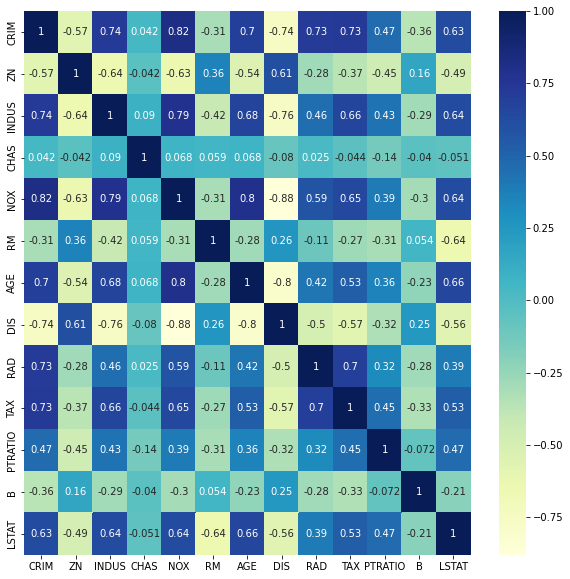

In [46]:
boston_corr = pd.DataFrame(boston.iloc[:,:-1]).corr('spearman')
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(boston_corr,annot = True,cmap="YlGnBu")

Lets use VIF for checking collinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = pd.DataFrame(boston.iloc[:,:-1]).columns
vif["vif_Factor"] = [variance_inflation_factor(boston.iloc[:,:-1].values, i) for i in range(boston.iloc[:,:-1].shape[1])]
vif

,features,vif_Factor
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


* :Here VIF_factor gives the collinearity of the features and it is very high for PTRATIO  we can use above mentioned techniques to remove the collinearity from the data.

# Now lets undertstand Multi Collinearity with Perturbation test

Import section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sqlite3
import re
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.model_selection import GridSearchCV
import pickle
import gc
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix,accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
# Converting to CSR_Matrix..
from scipy.sparse import csr_matrix

## Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it is easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score is above 3, then the recommendation will be set to "positive". Otherwise, it will be set to "negative".

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d snap/amazon-fine-food-reviews
!mkdir dataset
!unzip amazon-fine-food-reviews.zip -d dataset

Saving kaggle.json to kaggle.json
 97% 234M/242M [00:02<00:00, 136MB/s]
100% 242M/242M [00:02<00:00, 121MB/s]
Archive:  amazon-fine-food-reviews.zip
  inflating: dataset/Reviews.csv     
  inflating: dataset/database.sqlite  
  inflating: dataset/hashes.txt      


In [ ]:
db = '/content/dataset/database.sqlite'
connection = sqlite3.connect(db)


df_filtered = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """,connection)


print("Number of data points in our data", df_filtered.shape)
# df_filtered = df_filtered.head(3000)

Number of data points in our data (525814, 10)


## Exploratory Data Analysis

We will make all reviews with score greater than 3 as 1(positive) and less than 3 as 0(negative)

In [ ]:
df_filtered['Score'] = df_filtered['Score'].apply(lambda x: 1 if x>3 else 0)
df_filtered['Score'].head(3)

0    1
1    0
2    1
Name: Score, dtype: int64

It is observed (as shown in the table below) that the reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.  Following is an example:

In [ ]:
#Sorting data according to ProductId in ascending order
df_sorted=df_filtered.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#Deduplication of entries
df = df_sorted.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
print(df.shape)
df.head(3)

(364173, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...


<b>Observation:-</b> It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions<br>

* Helpfulness Numerator: Number of users who found the review helpful <br>
* Helpfulness Denominator: Number of users who indicated whether they found the review helpful or not

In [ ]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]
df.shape

(364171, 10)

In [ ]:
#checking how much data still remains

print(f'{round((df.shape[0]/df_filtered.shape[0])*100,2)}%')

69.26%


Now we will analyse target values

1    307061
0     57110
Name: Score, dtype: int64


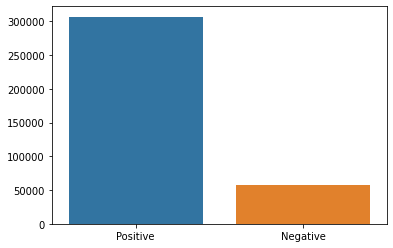

In [ ]:
print(df['Score'].value_counts())
values = df['Score'].value_counts().values
sns.barplot(x=['Positive','Negative'],y=values)
plt.show()

Clearly we have an imbalanced dataset. So It's better to use metrics like f1 score, AUC or log loss as perfomance metric

### Preprocessing Review Text

Now that we have finished deduplication our data requires some preprocessing before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

In [ ]:
# replacing some phrases like won't with will not

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])



In [ ]:
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(df['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    # removing html tags
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    # removing extra spaces and numbers
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    # removing non alphabels
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 364171/364171 [02:39<00:00, 2285.53it/s]


In [ ]:
#combining required columns
df['clean_text'] = preprocessed_reviews
df = df[['Time','clean_text','Score']]
#reseting index
df = df.reset_index(drop=True)

For the ease of computation we will sample just 10k points

In [ ]:
#sampling 10k points 
df_10k = df.sample(10000)
#sorting 10kpoints based on time
df_10k['Time'] = pd.to_datetime(df_10k['Time'],unit='s')
df_10k = df_10k.sort_values('Time')
#reseting index
df_10k = df_10k.reset_index(drop=True)

In [ ]:
df_10k['Score'].value_counts()

1    8474
0    1526
Name: Score, dtype: int64

Observation: We have clearly see an imbalenced dataset


## Train-test split

In [ ]:
#splitting data to train.cv and test
from sklearn.model_selection import train_test_split
x = df_10k['clean_text']
y = df_10k['Score']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y)
X_tr,X_cv,y_tr,y_cv = train_test_split(X_train,y_train,test_size=0.3,stratify=y_train)

### we will use bag of wors approach to vectorize text features

In [ ]:
bow = CountVectorizer()
bow.fit(X_tr)
X_train_bow = bow.transform(X_tr)
X_cv_bow = bow.transform(X_cv)
X_test_bow = bow.transform(X_test)

print('shape of X_train_bow is {}'.format(X_train_bow.get_shape()))
print('shape of X_cv_bow is {}'.format(X_cv_bow.get_shape()))
print('shape of X_test_bow is {}'.format(X_test_bow.get_shape()))

shape of X_train_bow is (4900, 14531)
shape of X_cv_bow is (2100, 14531)
shape of X_test_bow is (3000, 14531)


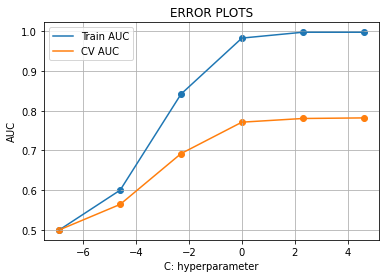

In [ ]:

C = [0.001,0.01,0.1,1,10,100]
train_auc = []
cv_auc = []

for c in C:
    model = LogisticRegression(penalty='l2',C=c,solver='liblinear')
    model.fit(X_train_bow,y_tr)
    y_tr_pred = model.predict(X_train_bow)
    y_cv_pred = model.predict(X_cv_bow)
    train_auc.append(roc_auc_score(y_tr,y_tr_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
plt.grid(True)
plt.plot(np.log(C),train_auc,label='Train AUC')
plt.plot(np.log(C),cv_auc,label='CV AUC')
plt.scatter(np.log(C),train_auc)
plt.scatter(np.log(C),cv_auc)
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

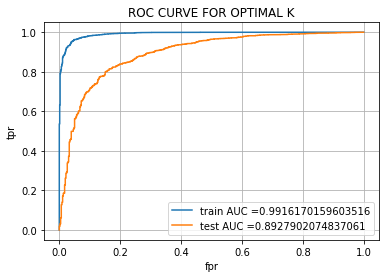

Area under train roc 0.9916170159603516
Area under test roc 0.8927902074837061


In [ ]:
model = LogisticRegression(penalty='l2',C=0.1,solver='liblinear')
model.fit(X_train_bow,y_tr)
y_tr_pred = model.predict(X_train_bow)
y_cv_pred = model.predict(X_cv_bow)
train_fpr, train_tpr, thresholds = roc_curve(y_tr, model.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_bow)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


### Top features

In [ ]:
feats = bow.get_feature_names()
coefs = model.coef_.reshape(-1,1)
dff = pd.DataFrame(coefs,columns=['coef'],index=feats)
top_neg = dff.sort_values(ascending=True,by='coef').head(10)
top_pos = dff.sort_values(ascending=False,by='coef').head(10)
print('Top 10 Positive features')
print(top_pos)
print('-'*50)
print('Top 10 Negative features')
print(top_neg)

Top 10 Positive features
               coef
great      0.981388
delicious  0.817037
love       0.786448
loves      0.745350
best       0.731305
excellent  0.706026
perfect    0.697916
wonderful  0.639858
highly     0.604942
nice       0.570484
--------------------------------------------------
Top 10 Negative features
                   coef
disappointed  -0.898654
waste         -0.659878
stale         -0.658322
weak          -0.633521
disappointing -0.626417
worst         -0.602347
awful         -0.587847
terrible      -0.569216
return        -0.567294
nothing       -0.549425


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Pertubation test

step 1 : Get weights W after we fit our model with data X.

In [ ]:
W = model.coef_

Step 2: Add noise to X and get new data X' ie X'= X + e 

Understanding Sparse Matrix:

Data: 
* data is an array containing all the non zero elements of the sparse matrix.Indices:
* indices is an array mapping each element in data to its column in the sparse matrix.
indptr:
* indptr then maps the elements of data and indices to the rows of the sparse matrix. This is done with the following reasoning:

If the sparse matrix has M rows, indptr is an array containing M+1 elements
for row i, [indptr[i]:indptr[i+1]] returns the indices of elements to take from data and indices corresponding to row i. So suppose indptr[i]=k and indptr[i+1]=l, the data corresponding to row i would be data[k:l] at columns indices[k:l]. This is the tricky part, and I hope the following example helps understanding it.

![](https://i.stack.imgur.com/12bPL.png)

In [ ]:
#noise
epsilon = 0.00005
# adding noise X_ = X + epsilon
X_ = X_train_bow.data + epsilon 
print(X_.shape)
X_train_bow_dash = csr_matrix((X_, X_train_bow.indices, X_train_bow.indptr), shape=X_train_bow.shape)
print(X_train_bow_dash.shape)

(162251,)
(4900, 14531)


Step 3: Fit the model again in data X_ and get new weights W_

In [ ]:
model = LogisticRegression(penalty='l2',C=0.1,solver='liblinear')
model.fit(X_train_bow_dash,y_tr)
W_ = model.coef_

Step 4: Add a small eps value(to eliminate the divisible by zero error) to W and W_

In [ ]:

epsilon2 = 0.000006
W = W + epsilon2
W_ = W_ + epsilon2

In [ ]:
np.percentile(percentage_change, 100)

19.860283552254234

Step 5:   find the % change between W and W_ (| (W-W_) / (W) |)*100)

In [ ]:
change = abs((W - W_)/(W))
percentage_change = change*100
percentage_change = percentage_change[0]


# Printing Percentiles :
for i in range(10, 101, 10):
    print("{}th Percentile value : {}".format(i, np.percentile(percentage_change, i)))
    
print('--'*50)

for i in range(90, 101):
    print("{}th Percentile value : {}".format(i, np.percentile(percentage_change, i)))

print('--'*50)

for i in range(1, 11):
    print("{}th Percentile value : {}".format((i*1.0/10 + 99), np.percentile(percentage_change, i*1.0/10 + 99)))

10th Percentile value : 0.0004528572369132689
20th Percentile value : 0.000850881313744373
30th Percentile value : 0.0012973002276608968
40th Percentile value : 0.0017590070386690592
50th Percentile value : 0.0022946850348977673
60th Percentile value : 0.0029699780200374295
70th Percentile value : 0.003757201568443961
80th Percentile value : 0.005072638859308908
90th Percentile value : 0.008395081700915207
100th Percentile value : 19.860283552254234
----------------------------------------------------------------------------------------------------
90th Percentile value : 0.008395081700915207
91th Percentile value : 0.009010593714529253
92th Percentile value : 0.009699357240257361
93th Percentile value : 0.01049837697777412
94th Percentile value : 0.012037546588421004
95th Percentile value : 0.013481259931063881
96th Percentile value : 0.015811149189125014
97th Percentile value : 0.020429474375317808
98th Percentile value : 0.029917529485158693
99th Percentile value : 0.063149078964219

We found that after 99.9th percentile there is significiant rise in weight difference value. It shows existance of multicollinearity. If we remove those weights it will be better

Step6: Remove those features showing high change

In [ ]:
feats = bow.get_feature_names()
change_ = percentage_change.reshape(-1,1)
pertub_df = pd.DataFrame(change_,columns=['change'],index=feats)
pertub_df.reset_index(inplace=True)
pertub_df = pertub_df.rename(columns={'index':'features'})
print(pertub_df.shape)
# pertub_df_sorted = pertub_df.sort_values(ascending=False,by=['change'])
pertub_df.tail(3)

(14531, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,features,change
14528,zuke,0.000096
14529,zukes,0.001401
14530,zuppa,0.004854


In [ ]:
#removing features with high change (> 99.9th percentile value)
pertub_df = pertub_df[pertub_df['change'] < 0.5838385159697708]
print(pertub_df.shape)
pertub_df.tail(3)

(14513, 2)


,features,change
14528,zuke,0.000096
14529,zukes,0.001401
14530,zuppa,0.004854


Now we can fit a logistic regression model using these features and so there exists no(little) multicollinearity

In [ ]:
import gc
idx = pertub_df.index.to_list()
# our features get reduced from 43064 to 43020. We will pick only those columns

X_train_d = X_train_bow.todense()[:,idx]
gc.collect()
X_test_d = X_test_bow.todense()[:,idx]
X_cv_d = X_cv_bow.todense()[:,idx]
print(X_train_d.shape)
print(X_cv_d.shape)
print(X_test_d.shape)

(4900, 14513)
(2100, 14513)
(3000, 14513)


In [ ]:
from scipy import sparse
X_train_d = sparse.csr_matrix(X_train_d)
X_cv_d = sparse.csr_matrix(X_cv_d)
X_test_d = sparse.csr_matrix(X_test_d)

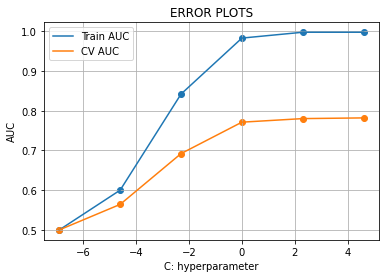

In [ ]:
#hyperparameter tuning

C = [0.001,0.01,0.1,1,10,100]
train_auc = []
cv_auc = []

for c in C:
    model = LogisticRegression(penalty='l2',C=c,solver='liblinear')
    model.fit(X_train_d,y_tr)
    y_tr_pred = model.predict(X_train_d)
    y_cv_pred = model.predict(X_cv_d)
    train_auc.append(roc_auc_score(y_tr,y_tr_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
plt.grid(True)
plt.plot(np.log(C),train_auc,label='Train AUC')
plt.plot(np.log(C),cv_auc,label='CV AUC')
plt.scatter(np.log(C),train_auc)
plt.scatter(np.log(C),cv_auc)
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

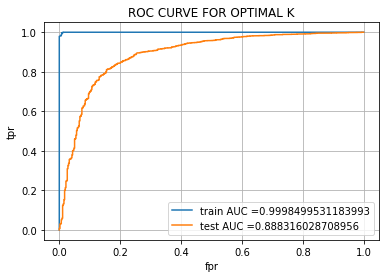

Area under train roc 0.9998499531183993
Area under test roc 0.888316028708956


In [ ]:
model = LogisticRegression(penalty='l2',C=1,solver='liblinear')
model.fit(X_train_d,y_tr)
y_tr_pred = model.predict(X_train_d)
y_cv_pred = model.predict(X_cv_d)
train_fpr, train_tpr, thresholds = roc_curve(y_tr, model.predict_proba(X_train_d)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_d)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


### Top features

In [ ]:
feats = pertub_df.features.to_list()
coefs = model.coef_.reshape(-1,1)
dff = pd.DataFrame(coefs,columns=['coef'],index=feats)
top_neg = dff.sort_values(ascending=True,by='coef').head(10)
top_pos = dff.sort_values(ascending=False,by='coef').head(10)
print('Top 10 Positive features')
print(top_pos)
print('-'*50)
print('Top 10 Negative features')
print(top_neg)

Top 10 Positive features
               coef
excellent  1.654092
delicious  1.551848
great      1.528753
loves      1.521455
wonderful  1.450013
highly     1.416255
love       1.415789
perfect    1.404984
best       1.265459
fresh      1.200146
--------------------------------------------------
Top 10 Negative features
                   coef
disappointed  -1.671790
awful         -1.619756
weak          -1.567851
disappointing -1.553340
stale         -1.476252
worst         -1.465648
waste         -1.442993
idea          -1.434098
terrible      -1.283519
stuck         -1.276515
